In [1]:
from IPython import display
display.Image("day5part1instructions.jpeg")

In [2]:
with open('day5input.txt') as day5input:
    raw_input = day5input.read()

raw_input[:1000]

In [3]:
input_lines = raw_input.splitlines()
input_lines[:20]

In [4]:
starting_stacks = input_lines[:9]
starting_stacks

['        [H]     [W] [B]            ',
 '    [D] [B]     [L] [G] [N]        ',
 '[P] [J] [T]     [M] [R] [D]        ',
 '[V] [F] [V]     [F] [Z] [B]     [C]',
 '[Z] [V] [S]     [G] [H] [C] [Q] [R]',
 '[W] [W] [L] [J] [B] [V] [P] [B] [Z]',
 '[D] [S] [M] [S] [Z] [W] [J] [T] [G]',
 '[T] [L] [Z] [R] [C] [Q] [V] [P] [H]',
 ' 1   2   3   4   5   6   7   8   9 ']

In [5]:
move_directions_list = input_lines[10:]
move_directions_list[:5]

['move 3 from 2 to 9',
 'move 1 from 1 to 6',
 'move 6 from 6 to 7',
 'move 13 from 7 to 6',
 'move 2 from 4 to 5']

In [6]:
# creating lists of crates matching the given starting stacks

stack1 = 'TDWZVP'
stack2 = 'LSWVFJD'
stack3 = 'ZMLSVTBH'
stack4 = 'RSJ'
stack5 = 'CZBGFMLW'
stack6 = 'QWVHZRGB'
stack7 = 'VJPCBDN'
stack8 = 'PTBQ'
stack9 = 'HGZRC'

stack1 = [crate for crate in stack1]
stack2 = [crate for crate in stack2]
stack3 = [crate for crate in stack3]
stack4 = [crate for crate in stack4]
stack5 = [crate for crate in stack5]
stack6 = [crate for crate in stack6]
stack7 = [crate for crate in stack7]
stack8 = [crate for crate in stack8]
stack9 = [crate for crate in stack9]

print(stack1)
print(stack2)
print(stack3)
print(stack4)
print(stack5)
print(stack6)
print(stack7)
print(stack8)
print(stack9)

['T', 'D', 'W', 'Z', 'V', 'P']
['L', 'S', 'W', 'V', 'F', 'J', 'D']
['Z', 'M', 'L', 'S', 'V', 'T', 'B', 'H']
['R', 'S', 'J']
['C', 'Z', 'B', 'G', 'F', 'M', 'L', 'W']
['Q', 'W', 'V', 'H', 'Z', 'R', 'G', 'B']
['V', 'J', 'P', 'C', 'B', 'D', 'N']
['P', 'T', 'B', 'Q']
['H', 'G', 'Z', 'R', 'C']


In [7]:
# creating dictionary of starting stacks

stacks = {1:stack1, 2:stack2, 3:stack3, 4:stack4, 5:stack5, 6:stack6, 7:stack7, 8:stack8, 9:stack9}
stacks

{1: ['T', 'D', 'W', 'Z', 'V', 'P'],
 2: ['L', 'S', 'W', 'V', 'F', 'J', 'D'],
 3: ['Z', 'M', 'L', 'S', 'V', 'T', 'B', 'H'],
 4: ['R', 'S', 'J'],
 5: ['C', 'Z', 'B', 'G', 'F', 'M', 'L', 'W'],
 6: ['Q', 'W', 'V', 'H', 'Z', 'R', 'G', 'B'],
 7: ['V', 'J', 'P', 'C', 'B', 'D', 'N'],
 8: ['P', 'T', 'B', 'Q'],
 9: ['H', 'G', 'Z', 'R', 'C']}

In [8]:
# splitting directions list into two lists: number of crates moved + which stack they are moved from/to

n_crates_strings_list = []
moves_strings_list = []

for direction in move_directions_list:
    direction_split = direction.split(' from ')
    n_crates_strings_list.append(direction_split[0])
    moves_strings_list.append(direction_split[1])

print(n_crates_strings_list[:5])
print(moves_strings_list[:5])

['move 3', 'move 1', 'move 6', 'move 13', 'move 2']
['2 to 9', '1 to 6', '6 to 7', '7 to 6', '4 to 5']


In [9]:
# converting lists from strings to ints 

n_crates_list = []
moves_list = []

for n_crates in n_crates_strings_list:
    n_crates_split = n_crates.split(' ')
    n_crates_list.append(int(n_crates_split[1]))

for moves in moves_strings_list:
    moves_split = moves.split(' to ')
    moves_list.append([int(moves_split[0]), int(moves_split[1])])

    
print(n_crates_list[:5])
print(moves_list[:5])

[3, 1, 6, 13, 2]
[[2, 9], [1, 6], [6, 7], [7, 6], [4, 5]]


In [10]:
# iterating through directions lists,
# grabbing given number of crates from given 'from' stack, 
# reversing their order (to account for crane moving them one at a time)
# adding them to the top of given 'to' stack

for n_crates, move in zip(n_crates_list, moves_list):
    
    crates_to_move = stacks[move[0]][-n_crates:]
    stacks[move[0]] = stacks[move[0]][0:-n_crates]
    crates_to_move.reverse()
    stacks[move[1]] = stacks[move[1]] + crates_to_move

stacks

{1: ['H', 'J', 'V', 'T'],
 2: ['F', 'J', 'T', 'Z', 'W', 'W', 'L'],
 3: ['B', 'W', 'P', 'R', 'F'],
 4: ['D', 'P', 'G'],
 5: ['V', 'C', 'B', 'Z', 'G', 'B'],
 6: ['G', 'V', 'L', 'S', 'V', 'Z'],
 7: ['C', 'W', 'Z', 'M', 'R', 'H'],
 8: ['Z', 'V', 'S', 'S', 'H', 'Q', 'M', 'B', 'P', 'C'],
 9: ['T', 'R', 'L', 'J', 'D', 'Q', 'D', 'B', 'N']}

In [11]:
# indentifying top of each stack by hand

top_of_each_stack = 'TLFGBZHCN'
top_of_each_stack

'TLFGBZHCN'

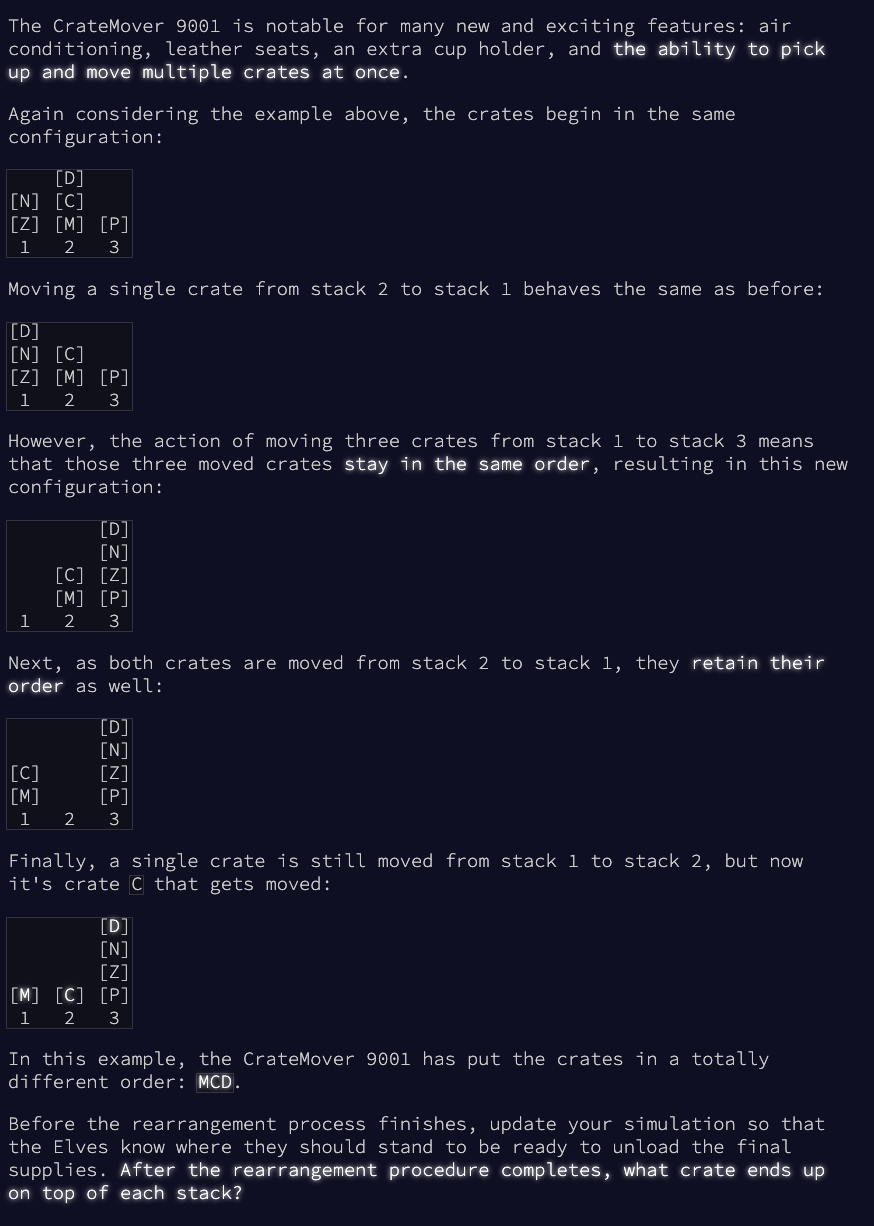

In [12]:
display.Image("day5part2instructions.jpeg")

In [13]:
# beginning from dictionary of starting stacks again: 

stacks = {1:stack1, 2:stack2, 3:stack3, 4:stack4, 5:stack5, 6:stack6, 7:stack7, 8:stack8, 9:stack9}
stacks

{1: ['T', 'D', 'W', 'Z', 'V', 'P'],
 2: ['L', 'S', 'W', 'V', 'F', 'J', 'D'],
 3: ['Z', 'M', 'L', 'S', 'V', 'T', 'B', 'H'],
 4: ['R', 'S', 'J'],
 5: ['C', 'Z', 'B', 'G', 'F', 'M', 'L', 'W'],
 6: ['Q', 'W', 'V', 'H', 'Z', 'R', 'G', 'B'],
 7: ['V', 'J', 'P', 'C', 'B', 'D', 'N'],
 8: ['P', 'T', 'B', 'Q'],
 9: ['H', 'G', 'Z', 'R', 'C']}

In [14]:
# iterating through directions lists as before, 
# but this time the crates being moved don't have their order reversed
# (as the crane can pick up multiple crates at once) 

for n_crates, move in zip(n_crates_list, moves_list):
    
    crates_to_move = stacks[move[0]][-n_crates:]
    stacks[move[0]] = stacks[move[0]][0:-n_crates]
    stacks[move[1]] = stacks[move[1]] + crates_to_move

stacks

{1: ['W', 'H', 'V', 'Q'],
 2: ['L', 'G', 'P', 'R', 'Z', 'M', 'R'],
 3: ['B', 'T', 'S', 'V', 'Q'],
 4: ['V', 'S', 'F'],
 5: ['C', 'T', 'M', 'B', 'D', 'H'],
 6: ['W', 'H', 'Z', 'R', 'J', 'F'],
 7: ['B', 'B', 'J', 'L', 'V', 'W'],
 8: ['D', 'P', 'W', 'G', 'J', 'Z', 'S', 'B', 'Z', 'C'],
 9: ['C', 'T', 'Z', 'P', 'G', 'N', 'V', 'D', 'L']}

In [15]:
# indentifying top of each stack by hand

top_of_each_stack = 'QRQFHFWCL'
top_of_each_stack

'QRQFHFWCL'